#Logistic Regression

In [ ]:
#dataset : Education
# Y variable is unknown ,so first have analyze the data and decide Y variable
# we have to predict the prebablity of are Parents are SATISFIED or not from school and students
#so here are some colmns


#Read the files
# Import Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

  #OLS library for linear regression

In [6]:
import statsmodels.api as sm

  Visualisation

In [7]:
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,classification_report
import scipy.stats as stats
import seaborn as sns
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF check correlation amongs features and find out which feature has maximum strength of correlation

feature selection for classification

# Reading Data and Exploration

In [8]:
from sklearn.feature_selection import f_classif

In [9]:
educ=pd.read_csv('F:\DATA SCIENCE\python\py\ALGORITHMS\Logistic Assessment\Edudata.csv')
educ.describe()
educ.shape
educ.columns
educ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

ur data is already in good from(not sorted form)<br>
________________________________<br>
              EDA<br>
hecking the nulls<br>
o by visulaization ther is no any nulls in data

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

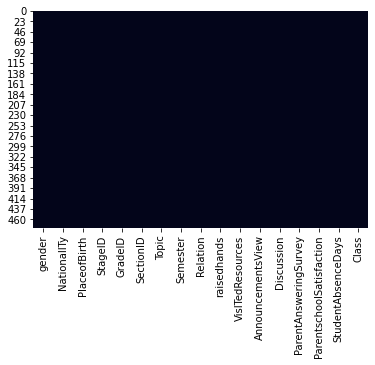

In [10]:
sns.heatmap(educ.isnull(),cbar=False)
educ.isnull().sum()

heking for Zeros<br>
Check zero

In [11]:
educ[educ==0].count()
# there are few zero value in 'raisedhands','VisITedResources','AnnouncementsView ' columns
cols=educ.columns
cols

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

ndex for row having 0

In [12]:
educ[cols][educ.raisedhands==0]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
24,M,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,0,2,3,70,Yes,Good,Above-7,L
38,M,KW,KuwaIT,MiddleSchool,G-06,A,IT,F,Father,0,0,0,4,No,Bad,Above-7,L
64,M,KW,KuwaIT,HighSchool,G-10,A,IT,F,Father,0,5,7,2,No,Bad,Above-7,L
104,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,0,12,3,3,Yes,Good,Above-7,M
105,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,0,0,5,80,Yes,Good,Above-7,L
115,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,0,8,11,70,Yes,Good,Above-7,L
121,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Mum,0,4,8,30,No,Bad,Above-7,L
124,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,0,6,4,15,Yes,Bad,Under-7,L
132,M,KW,KuwaIT,lowerlevel,G-02,C,IT,S,Father,0,3,10,3,No,Bad,Above-7,L


ow impute thte zero from weight column

# Imputation of Zero values using mean

In [13]:
educ.raisedhands.mean()
mean_r=educ[cols].mean()
mean_r
#raisedhands          46.775000
#VisITedResources     54.797917
#AnnouncementsView    37.918750
#Discussion           43.283333

raisedhands          46.775000
VisITedResources     54.797917
AnnouncementsView    37.918750
Discussion           43.283333
dtype: float64

imputing zeros by mean if its columns

In [14]:
educ.raisedhands[educ.raisedhands==0]=47
educ.VisITedResources[educ.VisITedResources==0]=55
educ.AnnouncementsView[educ.AnnouncementsView==0]=38
#validationg the imputation
educ[educ==0].count()
#imputaion is done

<ipython-input-14-8c7b8c0dcbd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educ.raisedhands[educ.raisedhands==0]=47
<ipython-input-14-8c7b8c0dcbd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educ.VisITedResources[educ.VisITedResources==0]=55
<ipython-input-14-8c7b8c0dcbd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educ.AnnouncementsView[educ.AnnouncementsView==0]=38


gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

hange the columns names for more convenience

# Feature Engineering

In [15]:
educ_new=educ.rename(columns={'NationalITy':'nation','PlaceofBirth':'POB',
                              'VisITedResources':'visited',
                              'AnnouncementsView':'announcement',
                              'ParentAnsweringSurvey':'survey',
                              'ParentschoolSatisfaction':'satisfaction',
                              'StudentAbsenceDays':'absent'})

In [16]:
educ_new.columns
#findout the numerical and factorila columns
numer=educ_new.select_dtypes(include=np.number)
print(numer)
fact=educ_new.select_dtypes(exclude=np.number)
print(fact)

     raisedhands  visited  announcement  Discussion
0             15       16             2          20
1             20       20             3          25
2             10        7            38          30
3             30       25             5          35
4             40       50            12          50
..           ...      ...           ...         ...
475            5        4             5           8
476           50       77            14          28
477           55       74            25          29
478           30       17            14          57
479           35       14            23          62

[480 rows x 4 columns]
    gender  nation     POB       StageID GradeID SectionID      Topic  \
0        M      KW  KuwaIT    lowerlevel    G-04         A         IT   
1        M      KW  KuwaIT    lowerlevel    G-04         A         IT   
2        M      KW  KuwaIT    lowerlevel    G-04         A         IT   
3        M      KW  KuwaIT    lowerlevel    G-04         A  

________________________________________________________________________________<br>
isualize just the categorical features individually to see <br>
hat options are included and how each option fares <br>
hen it comes to count(how many times it appears) and <br>
ee what can be deduce from that?

In [17]:
grade = educ_new.GradeID
visit = educ_new.visited
view= educ_new.announcement
attend = educ_new.absent

In [18]:
educ_new
#plt.bar(attend,rhd,label = 'raisedhands',color = 'yellow')
edduc_vis = pd.crosstab(index =educ_new.index, columns="count") #Make a crosstab  
 # Name the count column

# Data Visualization

<BarContainer object of 480 artists>

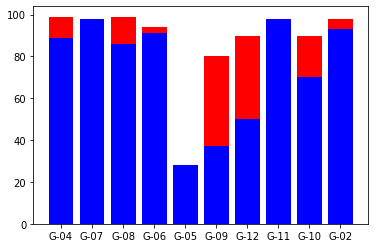

In [19]:
plt.bar(grade,visit,label = 'Visits',color = 'r')#plotting visits and announcemetns barchart
plt.bar(grade,view,label = 'Announcements',color = 'b' )

columns =  gender 
 ['M' 'F'] 

columns =  nation 
 ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia'] 

columns =  POB 
 ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia'] 

columns =  StageID 
 ['lowerlevel' 'MiddleSchool' 'HighSchool'] 

columns =  GradeID 
 ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02'] 

columns =  SectionID 
 ['A' 'B' 'C'] 

columns =  Topic 
 ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology'] 

columns =  Semester 
 ['F' 'S'] 

columns =  Relation 
 ['Father' 'Mum'] 

columns =  survey 
 ['Yes' 'No'] 

columns =  satisfaction 
 ['Good' 'Bad'] 

columns =  absent 
 ['Under-7' 'Above-7'] 

columns =  Class 
 ['M' 'L' 'H'] 



Text(0.5, 1.0, 'Counts of Class')

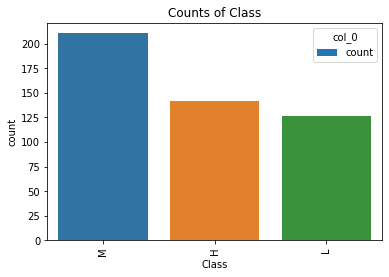

In [20]:
edduc_vis.plot.bar()
#it gives total levels on each catorical feature of dataset
for f in fact:
    print("columns = ", f ,"\n",educ_new[f].unique(),"\n")
#its represnt it by visulaization
educ_new.columns
#                               Classwise Count
sns.countplot(x='Class' , data= educ_new , order = educ_new['Class'].value_counts().index)
plt.title('Counts of Class')

                         Place of Birth wise Countplot 

Text(0.5, 1.0, 'Counts Place of Birth')

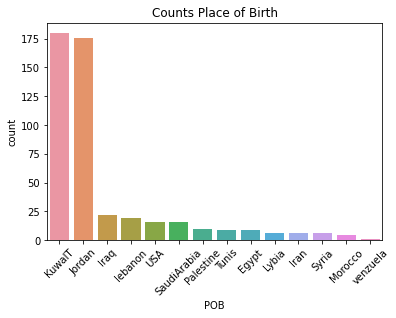

In [22]:
birth_count=sns.countplot(x='POB', data= educ_new , order = educ_new['POB'].value_counts().index)
birth_count.set_xticklabels(birth_count.get_xticklabels(), rotation=45)
plt.title('Counts Place of Birth')
 

Text(0.5, 1.0, 'Counts of Nationality')

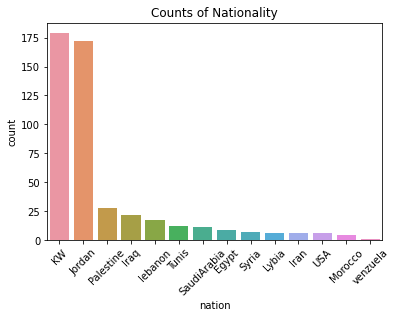

In [23]:
 #nationwise countplot
Nation_count=sns.countplot(x='nation', data= educ_new , order = educ_new['nation'].value_counts().index)
Nation_count.set_xticklabels(Nation_count.get_xticklabels(),rotation=45)
plt.title('Counts of Nationality')

                          Gender Wise Count

Text(0.5, 1.0, 'Counts of Gender')

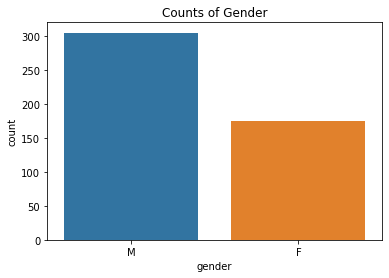

In [24]:
#Gende Wise Countplot
Gender_plot=sns.countplot(x='gender' , data= educ_new , order = educ_new['gender'].value_counts().index)

plt.title('Counts of Gender')

                          Satisfaction wise count

Text(0.5, 1.0, 'Counts of Parent satisfation')

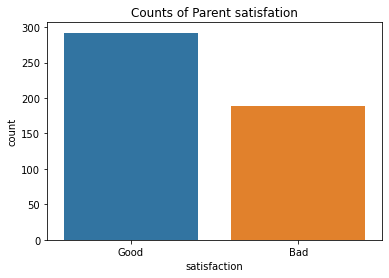

In [25]:
#Parent Satisfaction Countplot
sns.countplot(x='satisfaction' , data= educ_new , order = educ_new['satisfaction'].value_counts().index)
plt.title('Counts of Parent satisfation')

<br>
___________________________________________________________________<br>
ook at some categorical features in relation to each <br>
ther, to see what insights could be possibly read?<br>
__________________________________________________________________________<br>
To identify categorical properties

In [26]:
col = educ_new.select_dtypes(include='object').columns.values
col

array(['gender', 'nation', 'POB', 'StageID', 'GradeID', 'SectionID',
       'Topic', 'Semester', 'Relation', 'survey', 'satisfaction',
       'absent', 'Class'], dtype=object)

In [27]:
 
# Create seperate object datatype variable Dataframe
cat_df_api = educ_new.select_dtypes(exclude='number').copy()
cat_df_api

,gender,nation,POB,StageID,GradeID,SectionID,Topic,Semester,Relation,survey,satisfaction,absent,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


____________________________________________<br>
frequency Distribution of NationalITy column-->countrywise distribuition<br>
____________________________________________

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


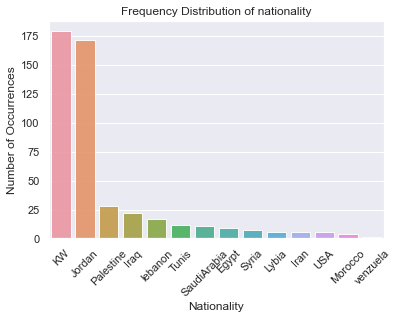

In [28]:
nationality_count = cat_df_api['nation'].value_counts()
sns.set(style="darkgrid")
nation=sns.barplot(nationality_count.index, nationality_count.values, alpha=0.9)
nation.set_xticklabels(nation.get_xticklabels(),rotation=45)
plt.title('Frequency Distribution of nationality')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Nationality', fontsize=12)
plt.show()

_____________________________<br>
Piechart-->country wise distruibution by piechart<br>
____________________________

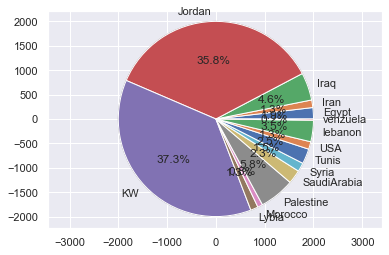

In [29]:
labels = cat_df_api['nation'].astype('category').cat.categories.tolist()
counts = cat_df_api['nation'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,radius=2000,frame=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


To encoding need to convert datatype 'object' into 'category'

In [31]:
cat_df_api['nation'] = cat_df_api['nation'].astype('category')

In [32]:
print(cat_df_api.dtypes)

gender            object
nation          category
POB               object
StageID           object
GradeID           object
SectionID         object
Topic             object
Semester          object
Relation          object
survey            object
satisfaction      object
absent            object
Class             object
dtype: object


Convert all categorical features into category using loop

In [33]:

cat_df_api

,gender,nation,POB,StageID,GradeID,SectionID,Topic,Semester,Relation,survey,satisfaction,absent,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


________________________________<br>
Label Encoding--> to make all varibles in form of 0 an d1<br>


# Label Encoding -to Make Preditions easy for mmodel

In [35]:
for i in fact:
    cat_df_api[i] = cat_df_api[i].astype('category')

for i in cat_df_api:
    cat_df_api[i] = cat_df_api[i].cat.codes
    


In [36]:
# Resampling
cat_df_api_lc=cat_df_api.sample(frac=1)

In [37]:
for i in fact:
    cat_df_api_lc[i] = cat_df_api_lc[i].astype('category')

In [38]:
cat_df_api_lc.dtypes
#_____________________________________________________________________
# Check multicolinearity to find out relation between features
# correlation matrix - take only the lower triangle. then plot the heatmap to check collinearity
#__


gender          category
nation          category
POB             category
StageID         category
GradeID         category
SectionID       category
Topic           category
Semester        category
Relation        category
survey          category
satisfaction    category
absent          category
Class           category
dtype: object

numerical varible  

In [39]:
numer
# Join numerical + categorical dataset
# Categorical dataset = cat_df_api_lc
new_api= cat_df_api_lc.join(numer)
new_api.head
new_api.dtypes
new_api.shape

(480, 17)

In [40]:
new_api

,gender,nation,POB,StageID,GradeID,SectionID,Topic,Semester,Relation,survey,satisfaction,absent,Class,raisedhands,visited,announcement,Discussion
404,0,9,9,1,4,0,1,0,1,1,1,1,0,96,95,70,70
47,0,4,4,0,9,0,3,0,1,1,1,1,0,70,4,39,90
116,0,4,4,2,0,2,7,0,1,1,1,0,2,77,80,12,19
263,1,0,0,2,1,0,8,1,1,0,0,0,2,49,94,42,7
186,1,4,4,1,5,0,0,1,1,1,1,1,2,85,15,22,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,1,3,3,1,5,0,2,1,1,1,1,1,2,70,82,75,29
76,1,1,1,0,6,0,7,0,1,1,1,1,2,15,70,37,44
302,0,3,3,2,1,1,10,0,1,0,0,1,2,11,20,21,23
426,1,3,3,1,5,0,2,0,1,1,1,0,2,80,80,62,11


________________________________________________________________________________________<br>
Check multicolinearity to find out relation between features which is numerical and catogorical also<br>
correlation matrix - take only the lower triangle. then plot the heatmap to check collinearity<br>
_

Text(0.5, 1.0, 'correlation Matrix')

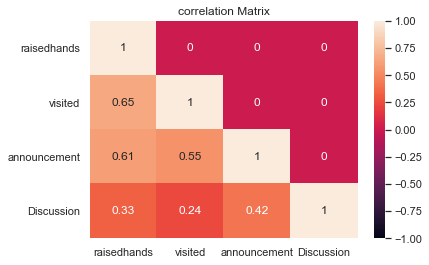

In [42]:
cols = list(numer.columns)
cor = numer[cols].corr()
cor = np.tril(cor)
sns.heatmap(cor,xticklabels=cols,yticklabels=cols,
            vmin=-1,vmax=1,annot=True,square=False)
plt.title("correlation Matrix")

In [43]:

#_____________________________________________________________________________________________
#From the above result, what are the factors that leads to 
#get low grades of the students?
#_____________________________________________________________________________________________
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variable Infialtion Factor 
#to decide the feature that kept for better model

In [44]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [45]:
X = new_api.iloc[:,:-1]
calc_vif(X)
    
#VIF starts at 1 and has no upper limit
#VIF = 1, no correlation between the independent variable and the other variables
#VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

,variables,VIF
0,gender,3.007190
1,nation,11.322261
2,POB,11.009889
3,StageID,8.510345
4,GradeID,5.105325
5,SectionID,2.056982
6,Topic,3.977950
7,Semester,2.223427
8,Relation,2.291651
9,survey,3.695916


ONCLUSION BASE ON VIF:----><br>
o Nation is column where we get VIF of 11.280 it means its a factor that leads ot get Low Grade Of Students<br>
___________________________________________________________________________________________<br>
uild classification model and present it's classification <br>
eport?

In [ ]:
new_api.Class
new_api.columns
new_api.Class.value_counts()

pliiting the datset 

# Splitting and Model Building

In [46]:
trainx,testx,trainy,testy = train_test_split(
                            new_api.drop('satisfaction',axis=1),
                            new_api['satisfaction'],
                            test_size=0.25)
trainx
testy
trainx.dtypes

gender          category
nation          category
POB             category
StageID         category
GradeID         category
SectionID       category
Topic           category
Semester        category
Relation        category
survey          category
absent          category
Class           category
raisedhands        int64
visited            int64
announcement       int64
Discussion         int64
dtype: object

In [47]:
print('trainx={}, trainy={}, testx={}, test={}'.format(trainx.shape,trainy.shape,testx.shape,testy.shape))


trainx=(360, 16), trainy=(360,), testx=(120, 16), test=(120,)


In [49]:
# build the logistic regression model using Logit()
import statsmodels.api as sm 
#in logistic regression Logit is the maths behind classification
#in linear regression OLS(ordinary least squarre is math behind regression)
#____________________________________
#           Model Building
m1 = sm.Logit(trainy,trainx).fit()
# summary of the model
m1.summary()
#___________________________________
#               Predictions
p1=m1.predict(testx)

Optimization terminated successfully.
         Current function value: 0.427026
         Iterations 6


ow convert probablities into classe

In [51]:
#converting probablities to classes
p1_y=p1.copy()
p1_y[p1_y<0.5]=0
p1_y[p1_y>0.5]=1


# Performance Matrix
#1)Confusion Matrix
#2)Area under curve

In [ ]:
#____________________________________
#           Performance amtrix
#confusion matrix of data
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [52]:
df=pd.DataFrame({'actual':testy,'predicted':p1_y})
pd.crosstab(df.actual,df.predicted,margins=True)
# beta values for individual features
m1.params
#classification report of model
import numpy as np
print(classification_report(testy,p1_y))
np.round(accuracy_score(testy,p1_y),3)

              precision    recall  f1-score   support

           0       0.73      0.64      0.68        47
           1       0.78      0.85      0.82        73

    accuracy                           0.77       120
   macro avg       0.76      0.74      0.75       120
weighted avg       0.76      0.77      0.76       120



0.767

In [ ]:
#Area under Curve 
#__________________________________________
            #AUC/ROC

AUC / ROC

In [55]:
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(testy,p1_y)

auc score

In [56]:
auc_score1 = metrics.auc(fpr,tpr)
print('AUC for the model = ', auc_score1)

AUC for the model =  0.7438064704167882


OC for 2nd model<br>
plot the ROC

Text(0, 0.5, 'TPR')

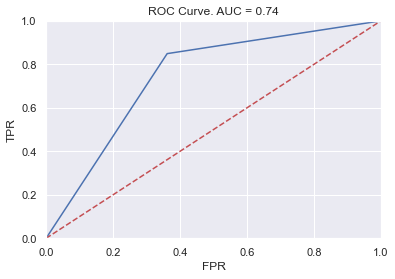

In [57]:
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve. AUC = ' + str(round(auc_score1,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
#_______________________________________________________________________________________
#END OF CODE --> code by shubham unde PGA 14